In [1]:
import numpy
import pandas as pd
train_df = pd.read_csv('sohu.csv',encoding='gbk')
train_df.head()

,label,text
0,pic,高清：彭帅谢淑薇遗憾遭逆转出局 击掌互相鼓励责编:马克杰 日期:2013-10-4 彭帅谢淑...
1,news,"河南周口路边秸秆燃烧 2岁幼儿被熏晕(图)? 10月3日下午,崔先生驾车去周口郸城县汲冢镇走..."
2,news,消息称138名中国劳工在菲律宾被抓 使馆正核实【使馆正核实情况】中国驻菲律宾大使馆发言人表示...
3,news,"越南重要军事领导人武元甲大将去世 享年102岁据美国媒体10月4日报道, 越南抗法、抗美战争..."
4,news,西沙搜救已发现6具遇难渔民遗体 尚有52人失踪【已发现6具遇难渔民遗体 尚有52人失踪】10...


In [2]:
for name, group in train_df.groupby("label"):
    print(name,'\t', len(group))

business 	 1051
caipiao 	 45
cul 	 44
mil 	 95
news 	 2989
pic 	 312
sports 	 1200
yule 	 185


In [3]:
import jieba, time
train_df.columns = ['分类', '文章']

In [4]:
stopword_list = [k.strip() for k in open('stopwords.txt', encoding='utf-8') if k.strip() != '']
 
cutWords_list = []
 
i = 0
startTime = time.time()
for article in train_df['文章']:
    cutWords = [k for k in jieba.cut(article) if k not in stopword_list]
    i += 1

    cutWords_list.append(cutWords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Public\Documents\Wondershare\CreatorTemp\jieba.cache
Loading model cost 0.578 seconds.
Prefix dict has been built succesfully.


In [6]:
import warnings
 
warnings.filterwarnings('ignore')
 
from gensim.models import Word2Vec

In [7]:
word2vec_model = Word2Vec(cutWords_list, size=100, iter=10, min_count=20)


In [11]:
MAX_SEQUENCE_LENGTH = 100 # 每条新闻最大长度
EMBEDDING_DIM = 100 # 词向量空间维度
VALIDATION_SPLIT = 0.16 # 验证集比例
TEST_SPLIT = 0.2 # 测试集比例

In [12]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(train_df['分类'])



In [14]:
p1 = int(len(data)*(1-VALIDATION_SPLIT-TEST_SPLIT))
p2 = int(len(data)*(1-TEST_SPLIT))
x_train = data[:p1]
y_train = labels[:p1]
x_val = data[p1:p2]
y_val = labels[p1:p2]
x_test = data[p2:]
y_test = labels[p2:]
print( 'train docs:'+str(len(x_train)))
print ('val docs:'+str(len(x_val)))
print ('test docs:'+str(len(x_test)))

train docs:3789
val docs:947
test docs:1185


In [15]:
#w2v

In [16]:

from keras.utils import plot_model
from keras.layers import Embedding
import gensim

w2v_model = word2vec_model
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items(): 
    if word in w2v_model:
        embedding_matrix[i] = np.asarray(w2v_model[word],
                                         dtype='float32')
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [23]:
#rnn

In [36]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential
from keras.layers.wrappers import Bidirectional

model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(SimpleRNN(200, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dropout(0.2))
model.add(Dense(labels.shape[1], activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          11545800  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 400)               120400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 3208      
Total params: 11,669,408
Trainable params: 123,608
Non-trainable params: 11,545,800
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)
print (model.evaluate(x_test, y_test))

Train on 3789 samples, validate on 947 samples
Epoch 1/10
3789/3789 [==============================] - 4s 1ms/step - loss: 1.0461 - acc: 0.6429 - val_loss: 0.9405 - val_acc: 0.7128
Epoch 2/10
3789/3789 [==============================] - 4s 993us/step - loss: 0.6842 - acc: 0.7648 - val_loss: 0.8309 - val_acc: 0.7402
Epoch 3/10
3789/3789 [==============================] - 4s 1ms/step - loss: 0.6279 - acc: 0.7815 - val_loss: 0.9134 - val_acc: 0.7159
Epoch 4/10
3789/3789 [==============================] - 4s 1ms/step - loss: 0.5800 - acc: 0.7952 - val_loss: 0.9122 - val_acc: 0.7107
Epoch 5/10
3789/3789 [==============================] - 4s 988us/step - loss: 0.5406 - acc: 0.8060 - val_loss: 0.8583 - val_acc: 0.7434
Epoch 6/10
3789/3789 [==============================] - 4s 980us/step - loss: 0.5298 - acc: 0.8113 - val_loss: 0.9385 - val_acc: 0.7159
Epoch 7/10
3789/3789 [==============================] - 4s 972us/step - loss: 0.5074 - acc: 0.8197 - val_loss: 0.8950 - val_acc: 0.7402
Epoch 8

In [38]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

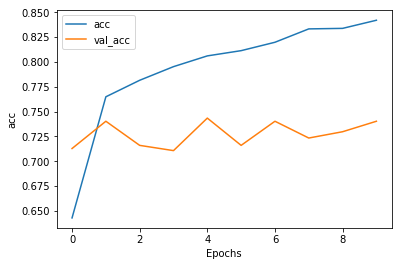

In [39]:
plot_graphs(history, 'acc')

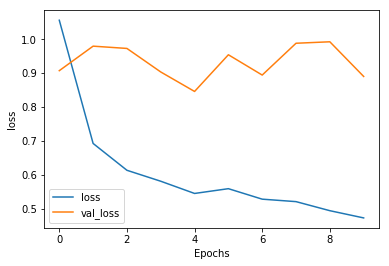

In [31]:
plot_graphs(history, 'loss')